In [1]:
from LSTM import LSTMPredictor

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import yfinance as yf

In [4]:
START = '2018-01-01'
END = '2023-02-15'
HORIZON = 70
BACKTEST = 30
ASSETS = ['AAPL', 'TSLA', 'PFE', 'SHEL', 'EQIX',
              'NFLX', 'WMT', 'GS', 'CBT', 'UPS']

In [5]:
asset_lstm_proj = []
for asset in ASSETS:
    try:
        l = LSTMPredictor(ticker=asset, start=START, end=END)
        asset_lstm_proj.append(l)
    except:
        print(asset)

[*********************100%***********************]  1 of 1 completed
Epoch 1/6
972/972 [==============================] - 11s 9ms/step - loss: 0.0031
Epoch 2/6
972/972 [==============================] - 9s 9ms/step - loss: 0.0011
Epoch 3/6
972/972 [==============================] - 9s 9ms/step - loss: 6.6988e-04
Epoch 4/6
972/972 [==============================] - 9s 9ms/step - loss: 9.2870e-04
Epoch 5/6
972/972 [==============================] - 9s 9ms/step - loss: 5.4103e-04
Epoch 6/6
972/972 [==============================] - 9s 10ms/step - loss: 5.2439e-04
[*********************100%***********************]  1 of 1 completed
Epoch 1/6
972/972 [==============================] - 11s 9ms/step - loss: 0.0031
Epoch 2/6
972/972 [==============================] - 9s 9ms/step - loss: 0.0013
Epoch 3/6
972/972 [==============================] - 9s 9ms/step - loss: 0.0010
Epoch 4/6
972/972 [==============================] - 9s 9ms/step - loss: 6.9856e-04
Epoch 5/6
972/972 [====================

In case some of the tickers fail to return datasets, do it manually and add to the list. 

In [6]:
# l =  LSTMPredictor(ticker='GS', start=START, end=END)
# l =  LSTMPredictor(ticker='UPS', start=START, end=END)
# l =  LSTMPredictor(ticker='PFE', start=START, end=END)

In [7]:
# asset_lstm_proj.append(l)

Check if all 11 stocks have been processed by LSTM. 

In [6]:
for ls in asset_lstm_proj:
    print(ls.ticker)

AAPL
TSLA
PFE
SHEL
EQIX
NFLX
WMT
GS
CBT
UPS


In [7]:
def plot_result(stock_data, training_data_len, predictions, ax, ticker):
    data = stock_data.filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predictions'] = predictions
    ax.set_title(ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price USD ($)')
    ax.plot(train)
    ax.plot(validation[['Close', 'Predictions']])
    ax.legend(['Train', 'Val', 'Predictions'], loc='lower right')


9/9 [==============================] - 1s 9ms/step
loss: 2.268553767222839
9/9 [==============================] - 1s 10ms/step
loss: 17.792382206898257
9/9 [==============================] - 1s 10ms/step
loss: 0.05526176779186679
9/9 [==============================] - 1s 9ms/step
loss: 0.936931743696042
9/9 [==============================] - 1s 10ms/step
loss: 7.043773962829827
9/9 [==============================] - 1s 9ms/step
loss: 5.4422628202327035
9/9 [==============================] - 1s 9ms/step
loss: 1.6731671878799854
9/9 [==============================] - 1s 9ms/step
loss: 12.373257529410871
9/9 [==============================] - 1s 9ms/step
loss: 0.2576513030649623
9/9 [==============================] - 1s 10ms/step
loss: 2.088071830541707


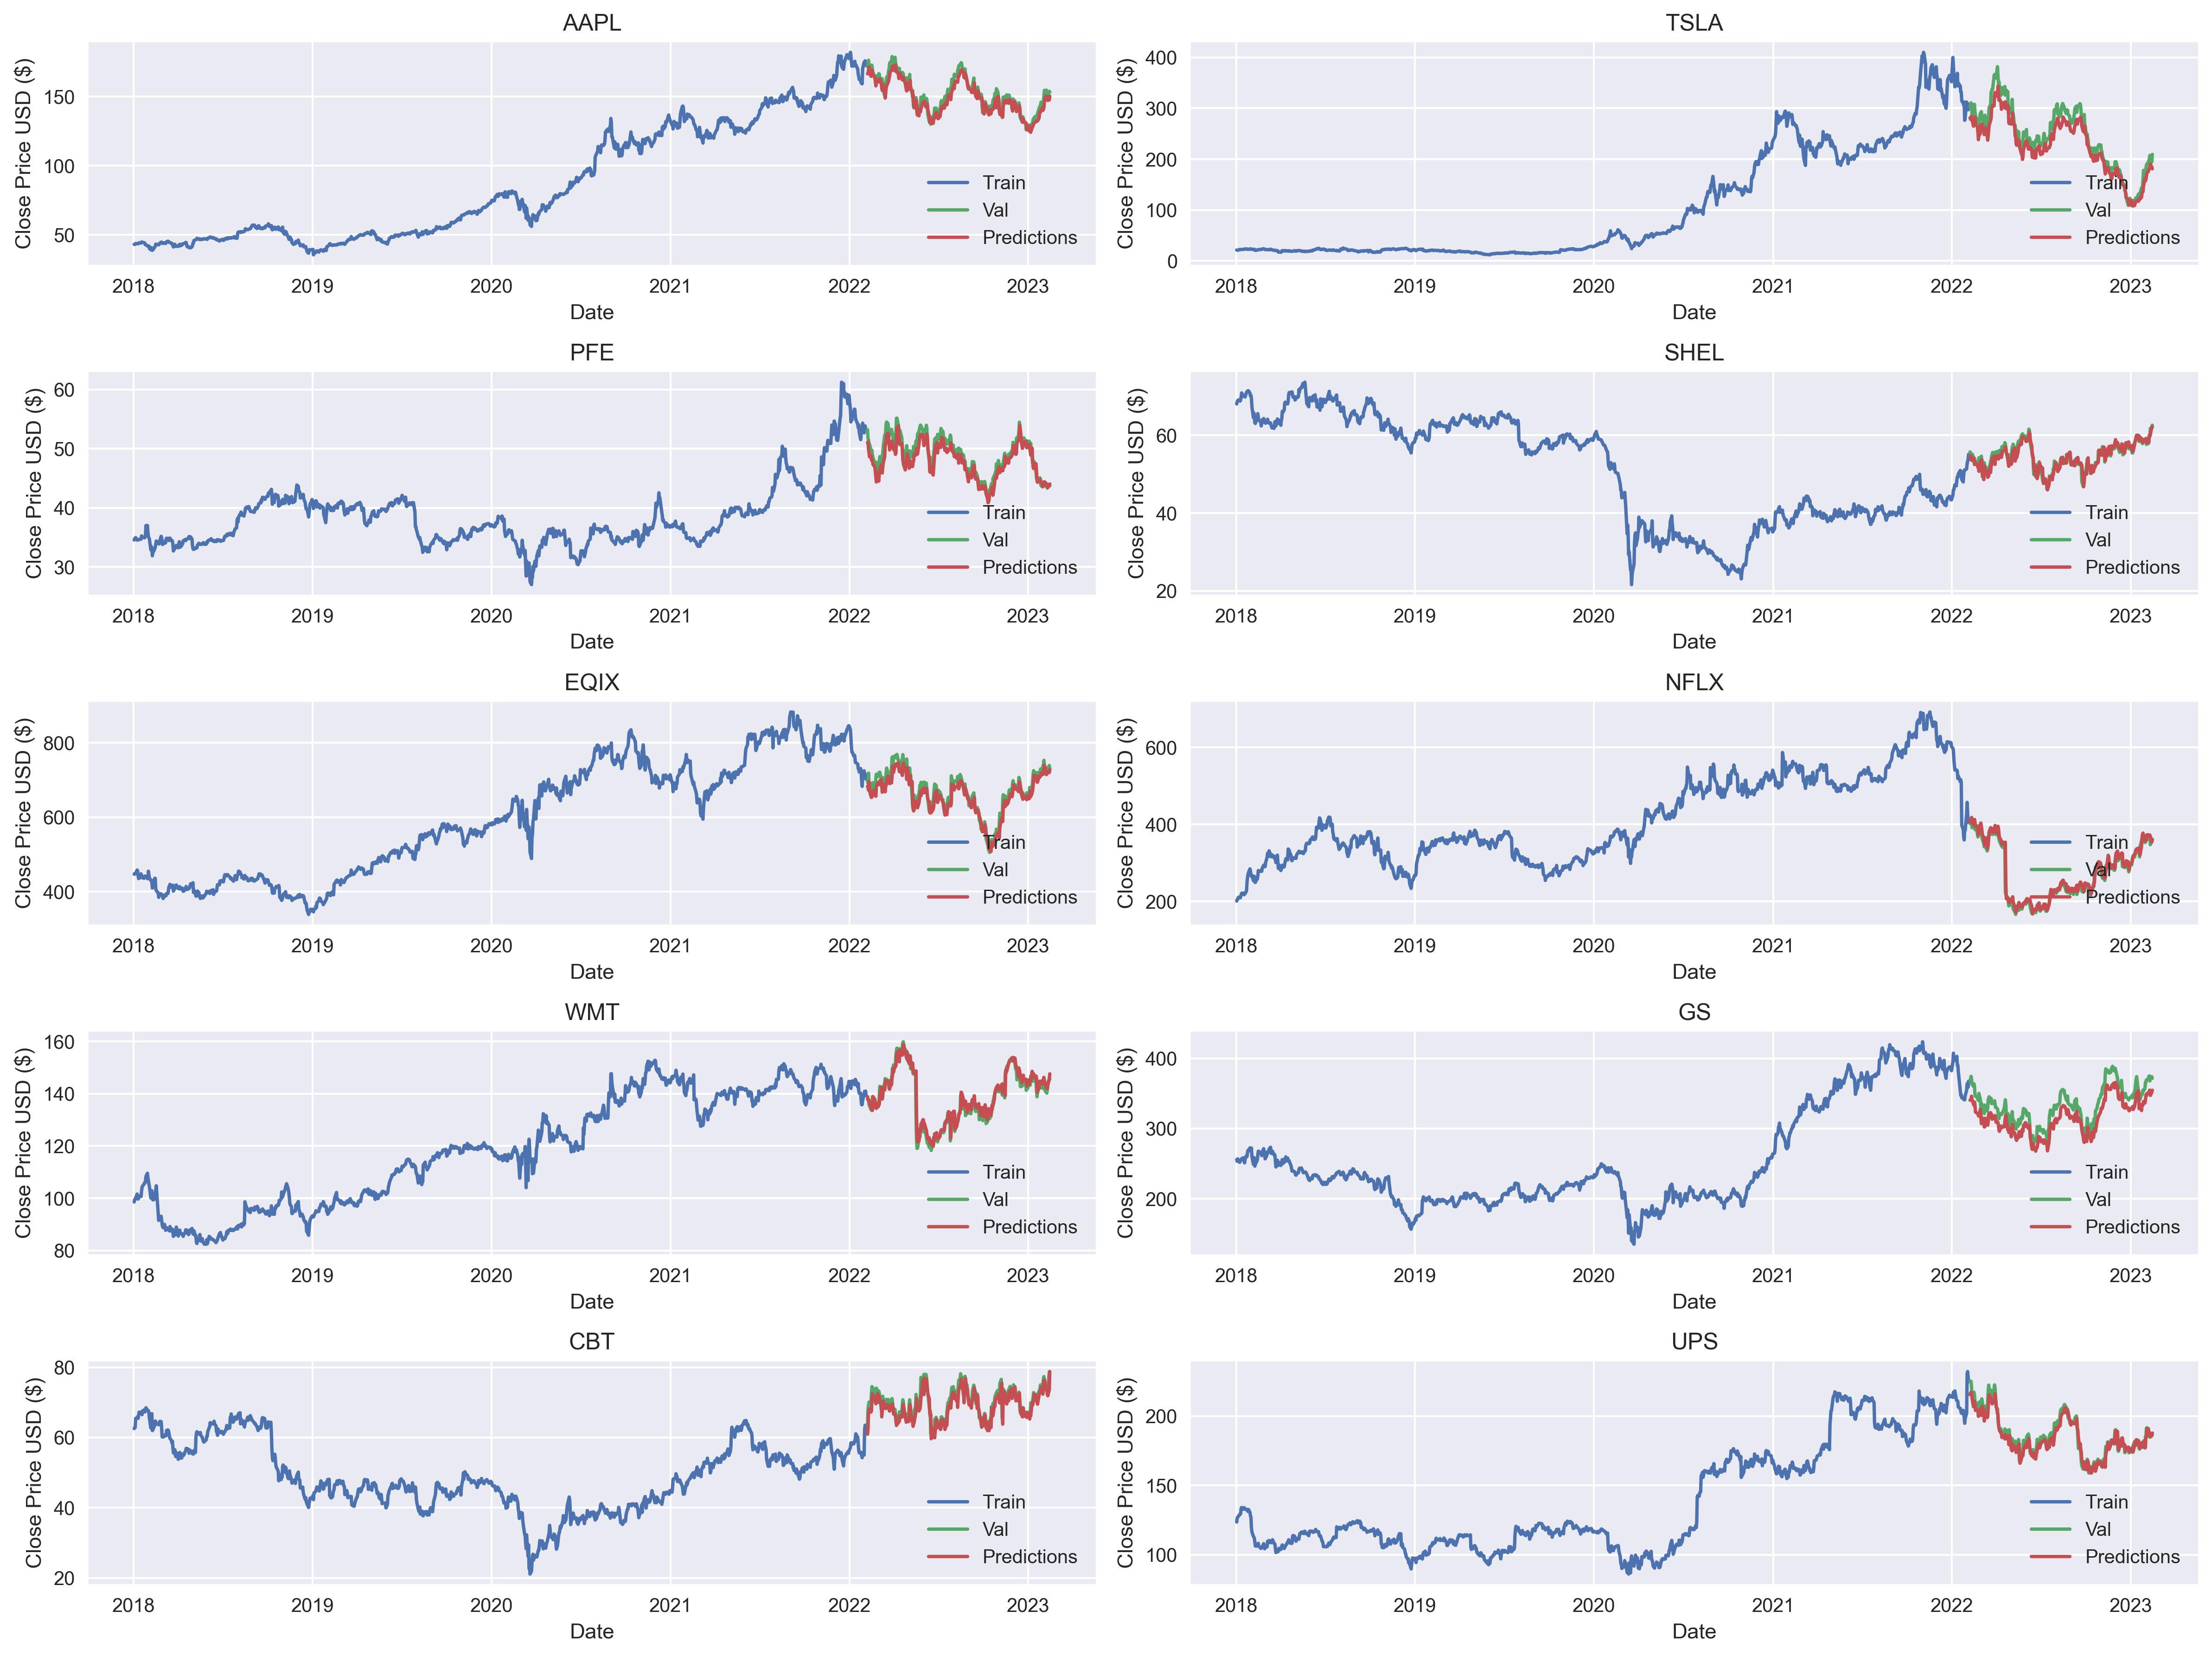

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(16,12), dpi=300)
ax = axes.flatten()
for i in range(len(asset_lstm_proj))[:10]:
    l = asset_lstm_proj[i]
    plot_result(l.stock_data, l.training_data_len, l.predict()[0], ax[i], l.ticker)
fig.tight_layout()

In [11]:
import pickle

with open('asset_lstm_obj.pkl', 'wb') as f:
    pickle.dump(asset_lstm_proj, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-23 19:22:39         3061
metadata.json                                  2023-02-23 19:22:39           64
variables.h5                                   2023-02-23 1

...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-23 19:22:40         3074
metadata.json                                  2023-02-23 19:22:40           64
variables.h5                                   2023-02-23 19:22:40      1515216
Keras weights file (<HDF5 file "variables.h5"

In [27]:
new_df = pd.DataFrame(np.zeros(shape=(257, 0)))
new_df

""
0
1
2
3
4
...
252
253
254
255


In [ ]:
asset_lstm_proj[0].ticker

In [39]:
for a in asset_lstm_proj:
    new_df[a.ticker] = list(a.stock_data['Adj Close'][a.training_data_len:])
    new_df[f"{a.ticker}_pred"] = a.predict()[0].reshape(1,-1)[0]
#     print(list(a.stock_data['Adj Close'][a.training_data_len:]))
    

9/9 [==============================] - 0s 10ms/step
loss: 2.268553767222839
9/9 [==============================] - 0s 11ms/step
loss: 17.792382206898257
9/9 [==============================] - 0s 10ms/step
loss: 0.05526176779186679
9/9 [==============================] - 0s 10ms/step
loss: 0.936931743696042
9/9 [==============================] - 0s 10ms/step
loss: 7.043773962829827
9/9 [==============================] - 0s 11ms/step
loss: 5.4422628202327035
9/9 [==============================] - 0s 11ms/step
loss: 1.6731671878799854
9/9 [==============================] - 0s 11ms/step
loss: 12.373257529410871
9/9 [==============================] - 0s 10ms/step
loss: 0.2576513030649623
9/9 [==============================] - 0s 12ms/step
loss: 2.088071830541707


In [40]:
new_df

,AAPL,AAPL_pred,TSLA,TSLA_pred,PFE,PFE_pred,SHEL,SHEL_pred,EQIX,EQIX_pred,NFLX,NFLX_pred,WMT,WMT_pred,GS,GS_pred,CBT,CBT_pred,UPS,UPS_pred
0,170.626389,166.655975,302.446655,281.275787,51.455738,51.031868,53.727512,54.198616,685.471558,683.105713,402.100006,412.139313,135.824936,138.814911,356.136749,340.518066,62.224857,60.933846,215.948364,215.529251
1,173.777328,166.465866,307.333344,278.258911,49.995525,51.130913,52.705235,54.760258,677.980042,679.338928,403.529999,405.760681,135.854477,137.555084,358.023132,340.470428,66.525299,62.332954,216.082687,216.788712
2,175.218567,169.503281,310.666656,281.452576,49.773109,49.813438,52.811317,53.687679,705.559875,672.810669,412.890015,407.243317,135.559097,137.713135,362.308594,342.088074,67.539467,66.903610,215.957947,217.163635
3,171.083633,171.437485,301.516663,284.453400,48.931786,49.346279,52.579861,53.776371,675.230774,695.805298,406.269989,418.000671,133.974014,137.471878,358.477783,346.210510,68.358589,67.508980,211.745682,217.152481
4,167.624588,168.149704,286.666656,277.351654,49.105854,48.626801,53.245304,53.509354,659.325134,671.180908,391.309998,414.484619,133.235641,135.908340,351.212860,341.688232,67.685738,68.169662,204.846771,213.022736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,151.688400,150.049469,201.289993,181.568878,43.980000,43.574055,58.922527,60.036476,730.989990,716.229187,366.829987,368.311615,140.220001,142.730301,372.433289,354.451141,72.911461,73.660492,184.732925,188.262039
253,150.639999,148.288757,207.320007,185.274979,43.340000,43.902584,59.239582,59.781513,732.700012,721.259766,362.500000,372.192841,141.520004,141.970001,365.373810,354.754822,72.334213,72.269211,183.136978,186.613144
254,151.009995,147.199890,196.889999,190.479431,43.880001,43.442146,61.191444,60.152023,729.750000,722.801147,347.359985,369.190826,143.720001,143.373001,368.640442,347.285614,73.677788,71.896057,183.602875,185.255295
255,153.850006,147.627899,194.639999,184.105576,43.990002,43.801369,61.260803,62.150681,738.869995,720.075684,358.570007,354.065735,145.910004,145.556412,371.360962,351.803467,78.375336,73.568703,185.773758,185.770584


In [42]:
new_df.pct_change().dropna().to_excel('new_df_pred.xlsx')

In [31]:
asset_lstm_proj[0].predict()[0].reshape(1,-1)[0]

9/9 [==============================] - 0s 10ms/step
loss: 2.268553767222839


array([166.65598 , 166.46587 , 169.50328 , 171.43748 , 168.1497  ,
       164.71083 , 164.73979 , 168.45549 , 168.98573 , 165.73154 ,
       163.77824 , 161.27017 , 157.7383  , 159.64685 , 162.04228 ,
       162.50359 , 160.59128 , 162.68008 , 162.67896 , 159.94089 ,
       156.30048 , 154.45862 , 158.99492 , 156.5139  , 152.74883 ,
       148.88033 , 151.97337 , 156.5012  , 157.86584 , 160.12074 ,
       161.09258 , 163.5749  , 164.82445 , 167.92957 , 168.7924  ,
       169.46034 , 172.3769  , 171.88408 , 169.18163 , 168.84445 ,
       172.77676 , 170.84222 , 167.81367 , 167.86278 , 166.58401 ,
       163.0519  , 164.28236 , 167.04382 , 163.19705 , 162.08133 ,
       163.89906 , 164.0971  , 163.24478 , 159.18835 , 159.41592 ,
       154.90674 , 154.08206 , 159.97552 , 156.28145 , 155.3128  ,
       156.32265 , 161.75008 , 154.99979 , 153.9014  , 149.92949 ,
       151.43164 , 145.8831  , 141.82664 , 144.93579 , 144.76204 ,
       147.3148  , 141.0112  , 136.61057 , 136.09839 , 140.581

In [14]:
asset_lstm_proj[0].stock_data['Adj Close'][asset_lstm_proj[0].training_data_len:]

Date
2022-02-07    170.626389
2022-02-08    173.777328
2022-02-09    175.218567
2022-02-10    171.083633
2022-02-11    167.624588
                 ...    
2023-02-08    151.688400
2023-02-09    150.639999
2023-02-10    151.009995
2023-02-13    153.850006
2023-02-14    153.199997
Name: Adj Close, Length: 257, dtype: float64

In [46]:
a.model.predict([a.train_data[-1, 0]])

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 1. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential_9/lstm_18/PartitionedCall]] [Op:__inference_predict_function_247379]

In [52]:
a.train_data[-60:,0]

array([0.85643735, 0.86739538, 0.8667313 , 0.85564048, 0.85796484,
       0.83126695, 0.82874337, 0.84222499, 0.85830957, 0.86451636,
       0.84222499, 0.8210681 , 0.81666317, 0.77481681, 0.74665212,
       0.78502818, 0.7905677 , 0.79944411, 0.82166872, 0.81719724,
       0.82934389, 0.8464964 , 0.82780885, 0.81065655, 0.82420503,
       0.83888789, 0.82967779, 0.80191345, 0.83308155, 0.84202471,
       0.86705257, 0.8865408 , 0.88367101, 0.88313694, 0.87846518,
       0.88140184, 0.87579556, 0.90109024, 0.88287001, 0.89675207,
       0.90689669, 0.86398239, 0.86091243, 0.86057864, 0.85557319,
       0.82934389, 0.82300369, 0.81079017, 0.80097914, 0.79870997,
       0.81325941, 0.79864321, 0.77902135, 0.75119047, 0.77401591,
       0.80044528, 0.99052297, 1.        , 0.97717466, 0.95114574])

In [48]:
a.x_train

array([[[0.18249773],
        [0.19870723],
        [0.2035583 ],
        ...,
        [0.06955567],
        [0.06042746],
        [0.06347025]],

       [[0.19870723],
        [0.2035583 ],
        [0.20586547],
        ...,
        [0.06042746],
        [0.06347025],
        [0.07528299]],

       [[0.2035583 ],
        [0.20586547],
        [0.21503497],
        ...,
        [0.06347025],
        [0.07528299],
        [0.0703908 ]],

       ...,

       [[0.8337243 ],
        [0.84089692],
        [0.84528009],
        ...,
        [0.77401591],
        [0.80044528],
        [0.99052297]],

       [[0.84089692],
        [0.84528009],
        [0.85643735],
        ...,
        [0.80044528],
        [0.99052297],
        [1.        ]],

       [[0.84528009],
        [0.85643735],
        [0.86739538],
        ...,
        [0.99052297],
        [1.        ],
        [0.97717466]]])